# Abhinav Malik (MDS202401)

## ADA Assignment-2


In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, r2_score

In [ ]:
file_path = r"C:\Users\abhim\Music\ADA Assignment-2\Unicauca-dataset-April-June-2019-Network-flows.csv"

df = pd.read_csv(file_path)

print("Shape:", df.shape)

Shape: (2704839, 50)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704839 entries, 0 to 2704838
Data columns (total 50 columns):
 #   Column                Dtype  
---  ------                -----  
 0   flow_key              object 
 1   src_ip_numeric        int64  
 2   src_ip                object 
 3   src_port              int64  
 4   dst_ip                object 
 5   dst_port              int64  
 6   proto                 int64  
 7   pktTotalCount         int64  
 8   octetTotalCount       int64  
 9   min_ps                int64  
 10  max_ps                int64  
 11  avg_ps                float64
 12  std_dev_ps            float64
 13  flowStart             float64
 14  flowEnd               float64
 15  flowDuration          float64
 16  min_piat              float64
 17  max_piat              float64
 18  avg_piat              float64
 19  std_dev_piat          float64
 20  f_pktTotalCount       int64  
 21  f_octetTotalCount     int64  
 22  f_min_ps              int64  
 23  f_max_p

In [ ]:
df.head()

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
0,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,22,7620,328,...,1.555955e+09,1.554399e+12,0.010354,198.657965,51.689181,84.916348,2,Network,Unknown,DHCP
1,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,17,5670,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP
2,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,43,15124,328,...,1.555965e+09,1.554409e+12,0.022332,340.268454,89.927588,124.270745,2,Network,Unknown,DHCP
3,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,30,10086,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP
4,cfa7c2740072befaa89c202499729e08,3232266497,192.168.121.1,0,10.130.1.166,0,1,1,56,56,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,ICMP


### Column Description

* `flow_key`: A unique identifier (hash) for each bidirectional flow, generated from the combination of source/destination IPs, ports, and protocol.
* `src_ip_numeric`: Numeric representation of the source IP address (useful for efficient storage and computation).
* `src_ip`: The **source IP address** from which the flow originated.
* `src_port`: The **source port number**, representing the application or service at the source machine.
* `dst_ip`: The **destination IP address** to which the flow is directed.
* `dst_port`: The **destination port number**, identifying the application or service on the destination machine.
* `proto`: The **protocol number** used (e.g., 6 = TCP, 17 = UDP).
* `pktTotalCount`: Total number of packets exchanged in the flow.
* `octetTotalCount`: Total number of bytes exchanged in the flow.
* `min_ps`: Minimum packet size observed in the flow (bytes).
* `max_ps`: Maximum packet size observed in the flow (bytes).
* `avg_ps`: Average packet size of the flow (bytes).
* `std_dev_ps`: Standard deviation of packet sizes, showing variability in packet lengths.
* `flowStart`: Timestamp (epoch) when the flow started.
* `flowEnd`: Timestamp (epoch) when the flow ended.
* `flowDuration`: Duration of the flow (flowEnd - flowStart), typically in milliseconds or seconds.
* `min_piat`: Minimum **Packet Inter-Arrival Time (PIAT)** in the flow, i.e., shortest time gap between two consecutive packets.
* `max_piat`: Maximum PIAT in the flow.
* `avg_piat`: Average PIAT of the flow.
* `std_dev_piat`: Standard deviation of PIAT values, showing burstiness/regularity of packets.
* `f_pktTotalCount`: Total number of packets in the **forward direction** (from source to destination).
* `f_octetTotalCount`: Total bytes exchanged in the forward direction.
* `f_min_ps`: Minimum packet size (forward direction).
* `f_max_ps`: Maximum packet size (forward direction).
* `f_avg_ps`: Average packet size (forward direction).
* `f_std_dev_ps`: Standard deviation of packet sizes (forward direction).
* `f_flowStart`: Start timestamp of the forward flow.
* `f_flowEnd`: End timestamp of the forward flow.
* `f_flowDuration`: Duration of the forward flow.
* `f_min_piat`: Minimum PIAT in the forward flow.
* `f_max_piat`: Maximum PIAT in the forward flow.
* `f_avg_piat`: Average PIAT in the forward flow.
* `f_std_dev_piat`: Standard deviation of PIAT values (forward flow).
* `b_pktTotalCount`: Total number of packets in the **backward direction** (from destination to source).
* `b_octetTotalCount`: Total bytes exchanged in the backward direction.
* `b_min_ps`: Minimum packet size (backward direction).
* `b_max_ps`: Maximum packet size (backward direction).
* `b_avg_ps`: Average packet size (backward direction).
* `b_std_dev_ps`: Standard deviation of packet sizes (backward direction).
* `b_flowStart`: Start timestamp of the backward flow.
* `b_flowEnd`: End timestamp of the backward flow.
* `b_flowDuration`: Duration of the backward flow.
* `b_min_piat`: Minimum PIAT in the backward flow.
* `b_max_piat`: Maximum PIAT in the backward flow.
* `b_avg_piat`: Average PIAT in the backward flow.
* `b_std_dev_piat`: Standard deviation of PIAT values (backward flow).
* `flowEndReason`: Reason for flow termination (e.g., idle timeout, TCP FIN/RST, or forced end).
* `category`: Broad category of the traffic (e.g., *Network*, *Application*, *Malware*).
* `application_protocol`: Application-level protocol inferred (e.g., *HTTP*, *TLS*, *DNS*).
#### * `web_service`: Identified web service/application (e.g., *YouTube*, *DHCP*, *Facebook*). ----- our label

## Data Description

The dataset (`Network-flows.csv`) consists of **network flow records** generated from captured traffic.  
Each row represents a flow (a set of packets between a source and destination).

- **Number of records:** 2,704,840  
- **Number of features:** 47 flow-level attributes + 1 target column  

- **Key feature groups:**  
  - **Flow metadata (7):** `flow_key`, `src_ip`, `dst_ip`, `src_port`, `dst_port`, `proto`, etc.  
  - **Traffic aggregate statistics (12):** `pktTotalCount`, `octetTotalCount`, `avg_ps`, `std_dev_ps`, `flowDuration`, etc.  
  - **Directional statistics:**  
    - Forward direction (`f_*`) features → 12  
    - Backward direction (`b_*`) features → 12  
  - **Categorical / extra fields (3):** `category`, `application_protocol`, `flowEndReason`  

- **Target variable:**  
  - `web_service` → represents the traffic class/application being accessed.  

The dataset provides sufficient **statistical** and **categorical** information to train machine learning models for **traffic classification**.

In [ ]:
df.describe()

,src_ip_numeric,src_port,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,...,b_avg_ps,b_std_dev_ps,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason
count,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,...,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06
mean,3.232268e+09,5.114658e+04,2.733782e+03,1.082042e+01,8.916930e+01,1.070166e+05,5.822987e+01,1.249313e+03,2.285245e+02,2.747979e+02,...,2.880519e+02,2.810434e+02,1.338105e+09,1.338105e+09,7.078825e+11,1.901194e+00,1.579579e+01,4.132842e+00,4.050805e+00,2.645965e+00
std,7.156085e+02,1.317720e+04,9.206813e+03,5.478148e+00,3.804669e+03,5.454587e+06,6.023631e+01,2.939242e+03,3.416309e+02,5.356919e+02,...,5.933458e+02,6.290754e+02,5.414336e+08,5.414336e+08,7.746749e+11,3.518928e+01,6.121748e+01,3.715773e+01,1.630467e+01,8.886754e-01
min,3.232266e+09,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
25%,3.232267e+09,4.977700e+04,5.300000e+01,6.000000e+00,2.000000e+00,1.600000e+02,4.000000e+01,8.200000e+01,6.900000e+01,8.000000e+00,...,4.600000e+01,0.000000e+00,1.556031e+09,1.556031e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,3.232268e+09,5.326100e+04,4.430000e+02,6.000000e+00,3.000000e+00,3.120000e+02,5.200000e+01,1.640000e+02,1.080882e+02,4.300000e+01,...,1.140000e+02,0.000000e+00,1.556138e+09,1.556139e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,3.232268e+09,5.901100e+04,4.430000e+02,1.700000e+01,1.800000e+01,5.336000e+03,6.500000e+01,1.458000e+03,2.492222e+02,4.278286e+02,...,2.800000e+02,3.922821e+02,1.556659e+09,1.556659e+09,1.554586e+12,6.198883e-06,3.407998e+00,3.276894e-01,5.035027e-01,3.000000e+00
max,3.232269e+09,6.553500e+04,6.553500e+04,1.700000e+01,2.292425e+06,2.981112e+09,1.162400e+04,2.632000e+04,1.162400e+04,9.370133e+03,...,1.583600e+04,1.168000e+04,1.559771e+09,1.559771e+09,1.558212e+12,1.780821e+03,1.780821e+03,1.780821e+03,8.399001e+02,5.000000e+00


In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical Columns:",numerical_cols)
print("\nCategorical Columns:",categorical_cols)

Numerical Columns: ['src_ip_numeric', 'src_port', 'dst_port', 'proto', 'pktTotalCount', 'octetTotalCount', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps', 'flowStart', 'flowEnd', 'flowDuration', 'min_piat', 'max_piat', 'avg_piat', 'std_dev_piat', 'f_pktTotalCount', 'f_octetTotalCount', 'f_min_ps', 'f_max_ps', 'f_avg_ps', 'f_std_dev_ps', 'f_flowStart', 'f_flowEnd', 'f_flowDuration', 'f_min_piat', 'f_max_piat', 'f_avg_piat', 'f_std_dev_piat', 'b_pktTotalCount', 'b_octetTotalCount', 'b_min_ps', 'b_max_ps', 'b_avg_ps', 'b_std_dev_ps', 'b_flowStart', 'b_flowEnd', 'b_flowDuration', 'b_min_piat', 'b_max_piat', 'b_avg_piat', 'b_std_dev_piat', 'flowEndReason']

Categorical Columns: ['flow_key', 'src_ip', 'dst_ip', 'category', 'application_protocol', 'web_service']


In [ ]:
distinct_counts = df.nunique()

print("Number of distinct entries per column:")
print(distinct_counts)

Number of distinct entries per column:
flow_key                2344534
src_ip_numeric              716
src_ip                      716
src_port                  61314
dst_ip                   104463
dst_port                  33753
proto                         3
pktTotalCount              8984
octetTotalCount          154581
min_ps                      711
max_ps                    14548
avg_ps                   410222
std_dev_ps               833730
flowStart               2645081
flowEnd                 2621434
flowDuration            1430642
min_piat                 310582
max_piat                1268402
avg_piat                1554611
std_dev_piat            1394435
f_pktTotalCount            5623
f_octetTotalCount         56947
f_min_ps                   1034
f_max_ps                   6980
f_avg_ps                 210778
f_std_dev_ps             634260
f_flowStart             2645081
f_flowEnd               2397265
f_flowDuration          1288078
f_min_piat               243202
f

In [ ]:
df.columns

Index(['flow_key', 'src_ip_numeric', 'src_ip', 'src_port', 'dst_ip',
       'dst_port', 'proto', 'pktTotalCount', 'octetTotalCount', 'min_ps',
       'max_ps', 'avg_ps', 'std_dev_ps', 'flowStart', 'flowEnd',
       'flowDuration', 'min_piat', 'max_piat', 'avg_piat', 'std_dev_piat',
       'f_pktTotalCount', 'f_octetTotalCount', 'f_min_ps', 'f_max_ps',
       'f_avg_ps', 'f_std_dev_ps', 'f_flowStart', 'f_flowEnd',
       'f_flowDuration', 'f_min_piat', 'f_max_piat', 'f_avg_piat',
       'f_std_dev_piat', 'b_pktTotalCount', 'b_octetTotalCount', 'b_min_ps',
       'b_max_ps', 'b_avg_ps', 'b_std_dev_ps', 'b_flowStart', 'b_flowEnd',
       'b_flowDuration', 'b_min_piat', 'b_max_piat', 'b_avg_piat',
       'b_std_dev_piat', 'flowEndReason', 'category', 'application_protocol',
       'web_service'],
      dtype='object')

## Questions Addressed

This analysis aims to answer:

1. Can we classify network flows into correct `web_service` classes using ML?
2. Which features (packet counts, durations, port numbers, etc.) are most important for distinguishing traffic?
3. Which ML algorithm (KNN, Random Forest, XGBoost, Logistic Regression) achieves the best accuracy?
4. What are the limitations or sources of misclassification in the dataset?


In [ ]:
# Create a connection key
df_alt = df.copy()
df_alt["conn_id"] = (
    df_alt["src_ip"].astype(str) + ":" + df_alt["src_port"].astype(str) + "-" +
    df_alt["dst_ip"].astype(str) + ":" + df_alt["dst_port"].astype(str)
)

# Number of unique connections
num_conn = df_alt["conn_id"].nunique()

# Total rows
total_rows = len(df_alt)

print(f"Unique connections: {num_conn}")
print(f"Unique flow keys: {df['flow_key'].nunique()}")
print(f"Total rows: {total_rows}")

Unique connections: 2344392
Unique flow keys: 2344534
Total rows: 2704839


In [ ]:
# 1. Find null values before processing
print("Null values BEFORE processing")
print("Null values per column:")
print(df.isna().sum())

missing_rows = df.isna().any(axis=1).sum()
print(f"\nTotal rows containing at least one null: {missing_rows}")

Null values BEFORE processing
Null values per column:
flow_key                0
src_ip_numeric          0
src_ip                  0
src_port                0
dst_ip                  0
dst_port                0
proto                   0
pktTotalCount           0
octetTotalCount         0
min_ps                  0
max_ps                  0
avg_ps                  0
std_dev_ps              0
flowStart               0
flowEnd                 0
flowDuration            0
min_piat                0
max_piat                0
avg_piat                0
std_dev_piat            0
f_pktTotalCount         0
f_octetTotalCount       0
f_min_ps                0
f_max_ps                0
f_avg_ps                0
f_std_dev_ps            0
f_flowStart             0
f_flowEnd               0
f_flowDuration          0
f_min_piat              0
f_max_piat              0
f_avg_piat              0
f_std_dev_piat          0
b_pktTotalCount         0
b_octetTotalCount       0
b_min_ps                0
b_max_ps  

## EDA and Plotting the data

In [ ]:
# Count rows per label
service_counts = df["web_service"].value_counts()

print(f"Total distinct labels: {df['web_service'].nunique()}")
print("\nRows per label:")
print(service_counts)

Total distinct labels: 141

Rows per label:
web_service
Google       569828
DNS          419915
TLS          259590
Unknown      249071
Microsoft    172392
              ...  
MySQL             1
MDNS              1
BGP               1
SOMEIP            1
GTP               1
Name: count, Length: 141, dtype: int64


In [ ]:
  # Frequency distribution of web_service
ws_counts = df["web_service"].value_counts()

# Select top 50 classes
top50 = ws_counts.head(50).index

# Prepare data for pie chart (top 49 + aggregate rest as "Other")
top49 = ws_counts.head(49)
remaining_sum = ws_counts.iloc[49:].sum()
pie_data = pd.concat([top49, pd.Series({"Other": remaining_sum})])

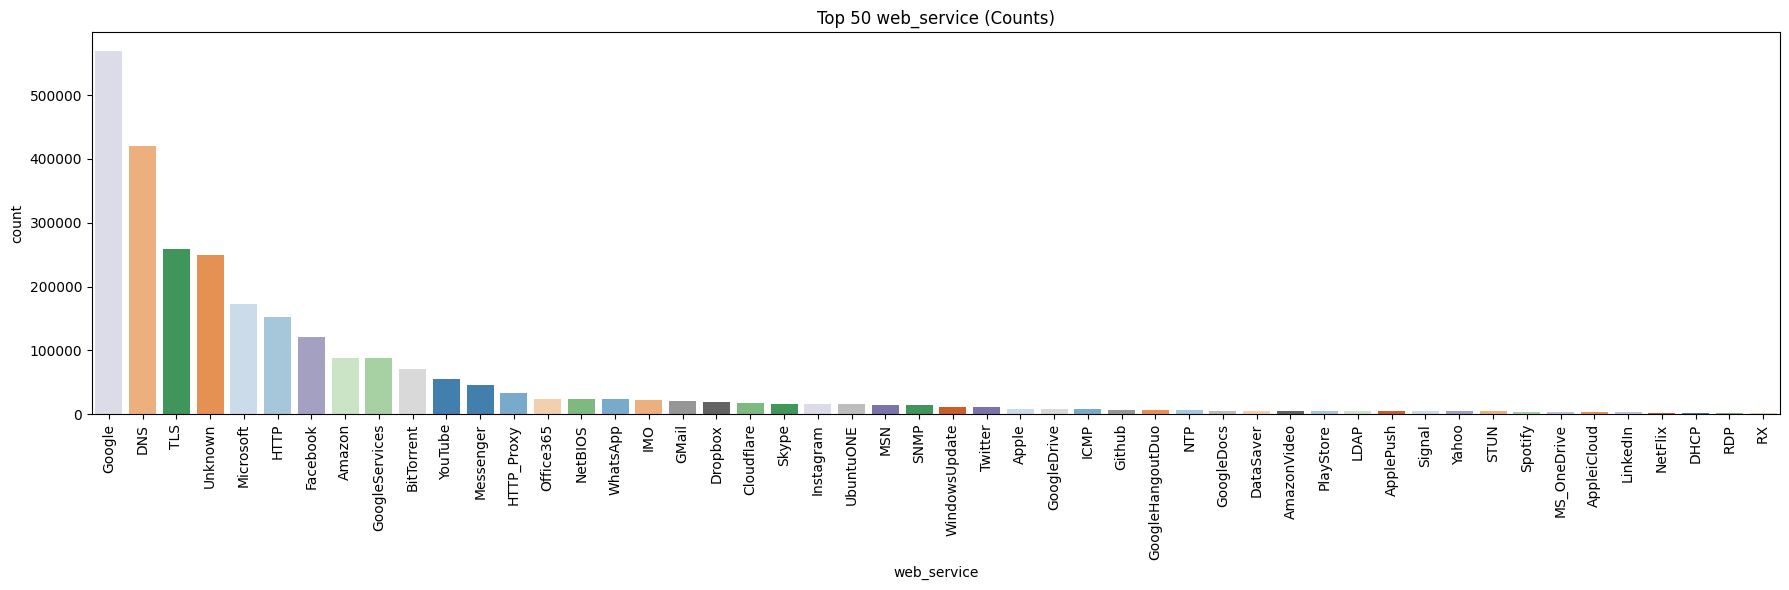

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))  # Only one axis now

# Bar chart for top 50 classes
sns.countplot(
    data=df[df["web_service"].isin(top50)],
    x="web_service",
    hue="web_service",
    order=top50,
    palette="tab20c",
    legend=False,
    ax=ax
)
ax.set_title("Top 50 web_service (Counts)")
ax.tick_params(axis="x", rotation=90)

plt.tight_layout()
plt.show()

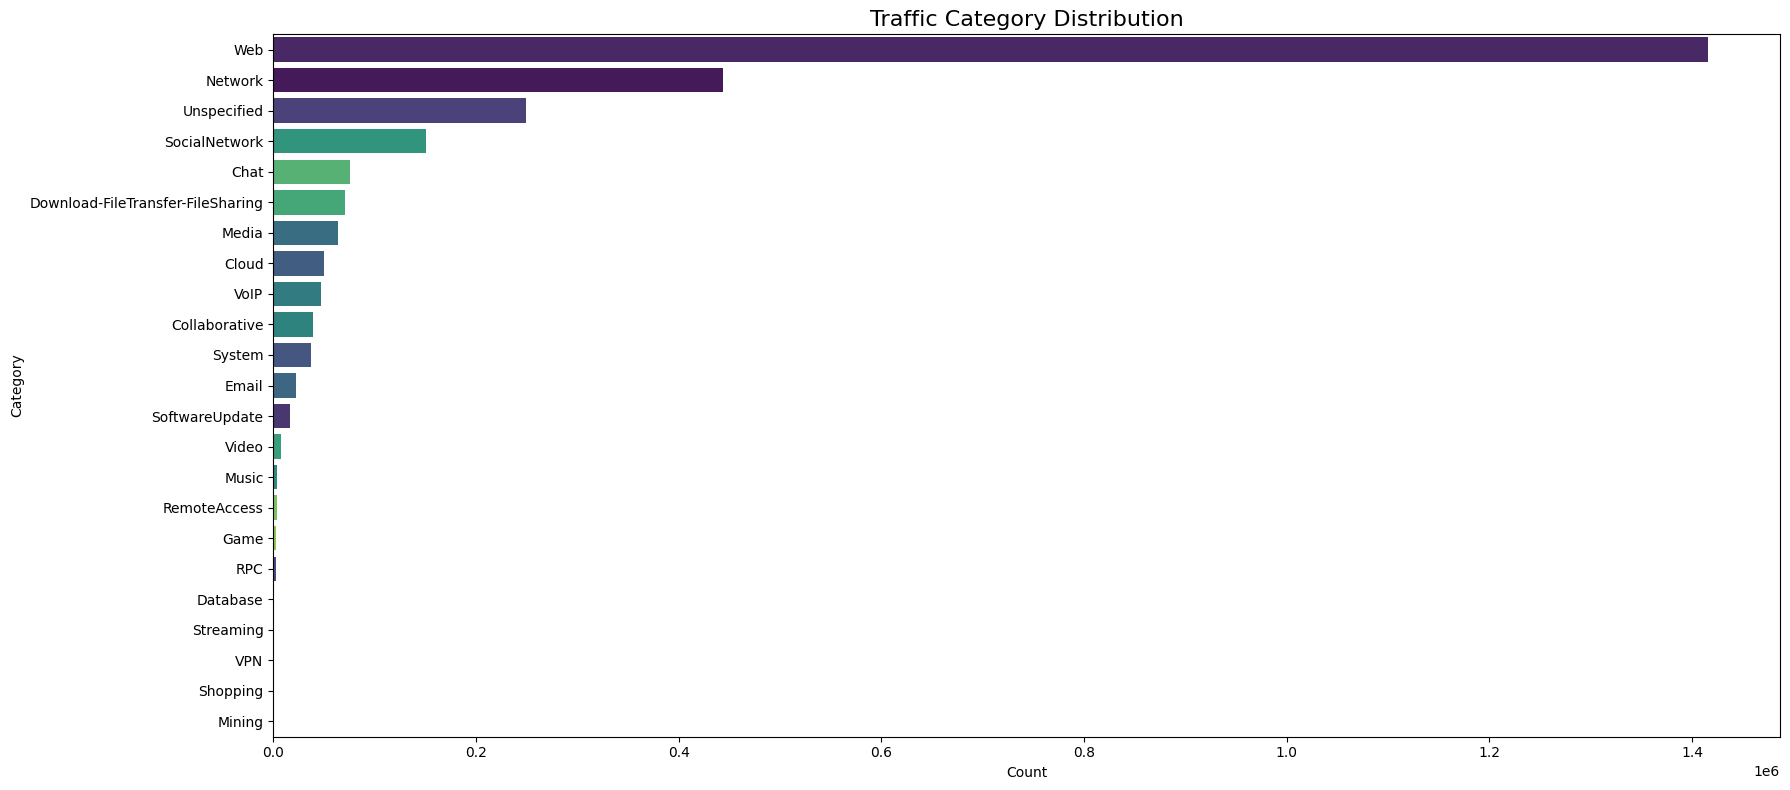

In [ ]:
# Category Frequency Plot
plt.figure(figsize=(18, 8))
sns.countplot(
    data=df,
    y="category",
    hue="category",
    palette="viridis",
    order=df["category"].value_counts().index,
    legend=False
)
plt.title("Traffic Category Distribution", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

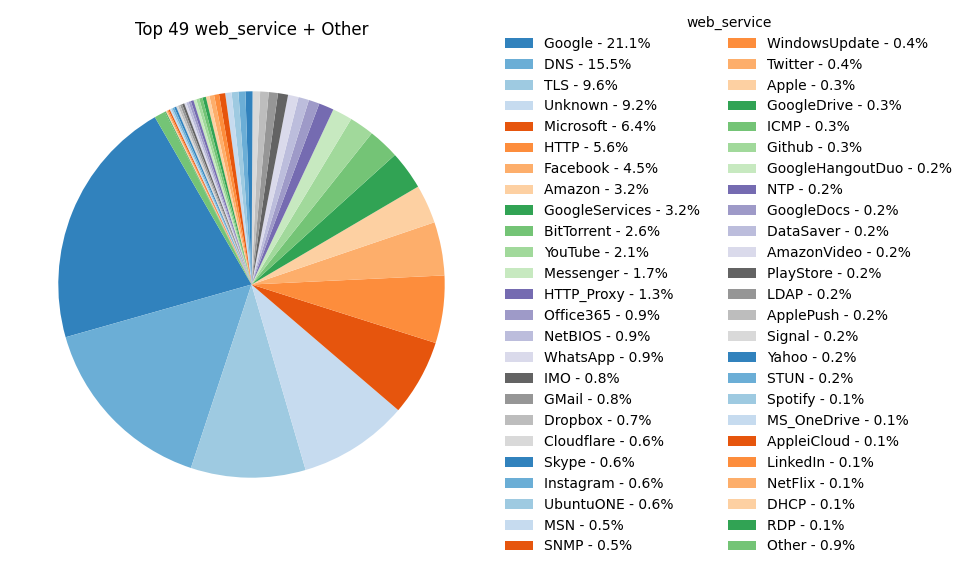

In [ ]:
# Pie chart for top 49 + Other
fig, ax = plt.subplots(figsize=(18, 6))

colors = sns.color_palette("tab20c", len(pie_data))
wedges, _ = ax.pie(
    pie_data,
    startangle=120,
    colors=colors
)
ax.set_title("Top 49 web_service + Other")

# Custom legend with percentages
total_vals = pie_data.sum()
legend_entries = [
    f"{label} - {count / total_vals:.1%}" for label, count in pie_data.items()
]

ax.legend(
    wedges,
    legend_entries,
    title="web_service",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()

In [ ]:
# Encode categorical features
df_num = df.copy()
encoders = {}
for col in df_num.columns:
    if df_num[col].dtype == "object":
        le = LabelEncoder()
        df_num[col] = le.fit_transform(df_num[col].astype(str))
        encoders[col] = le

# Correlation matrix
corr_matrix = df_num.corr()
corr_flat = corr_matrix.stack().reset_index()
corr_flat.columns = ["Var1", "Var2", "Corr"]

# Plot correlation heatmap
fig = go.Figure(
    data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.columns,
        colorscale="Picnic",
        zmin=-1, zmax=1,
        colorbar=dict(title="Correlation"),
        hovertemplate="Var1: %{x}<br>Var2: %{y}<br>Corr: %{z:.2f}<extra></extra>"
    )
)

fig.update_layout(
    title="Correlation Heatmap (Encoded Features)",
    width=1300,
    height=650,
    xaxis=dict(tickangle=-75)
)

fig.show()

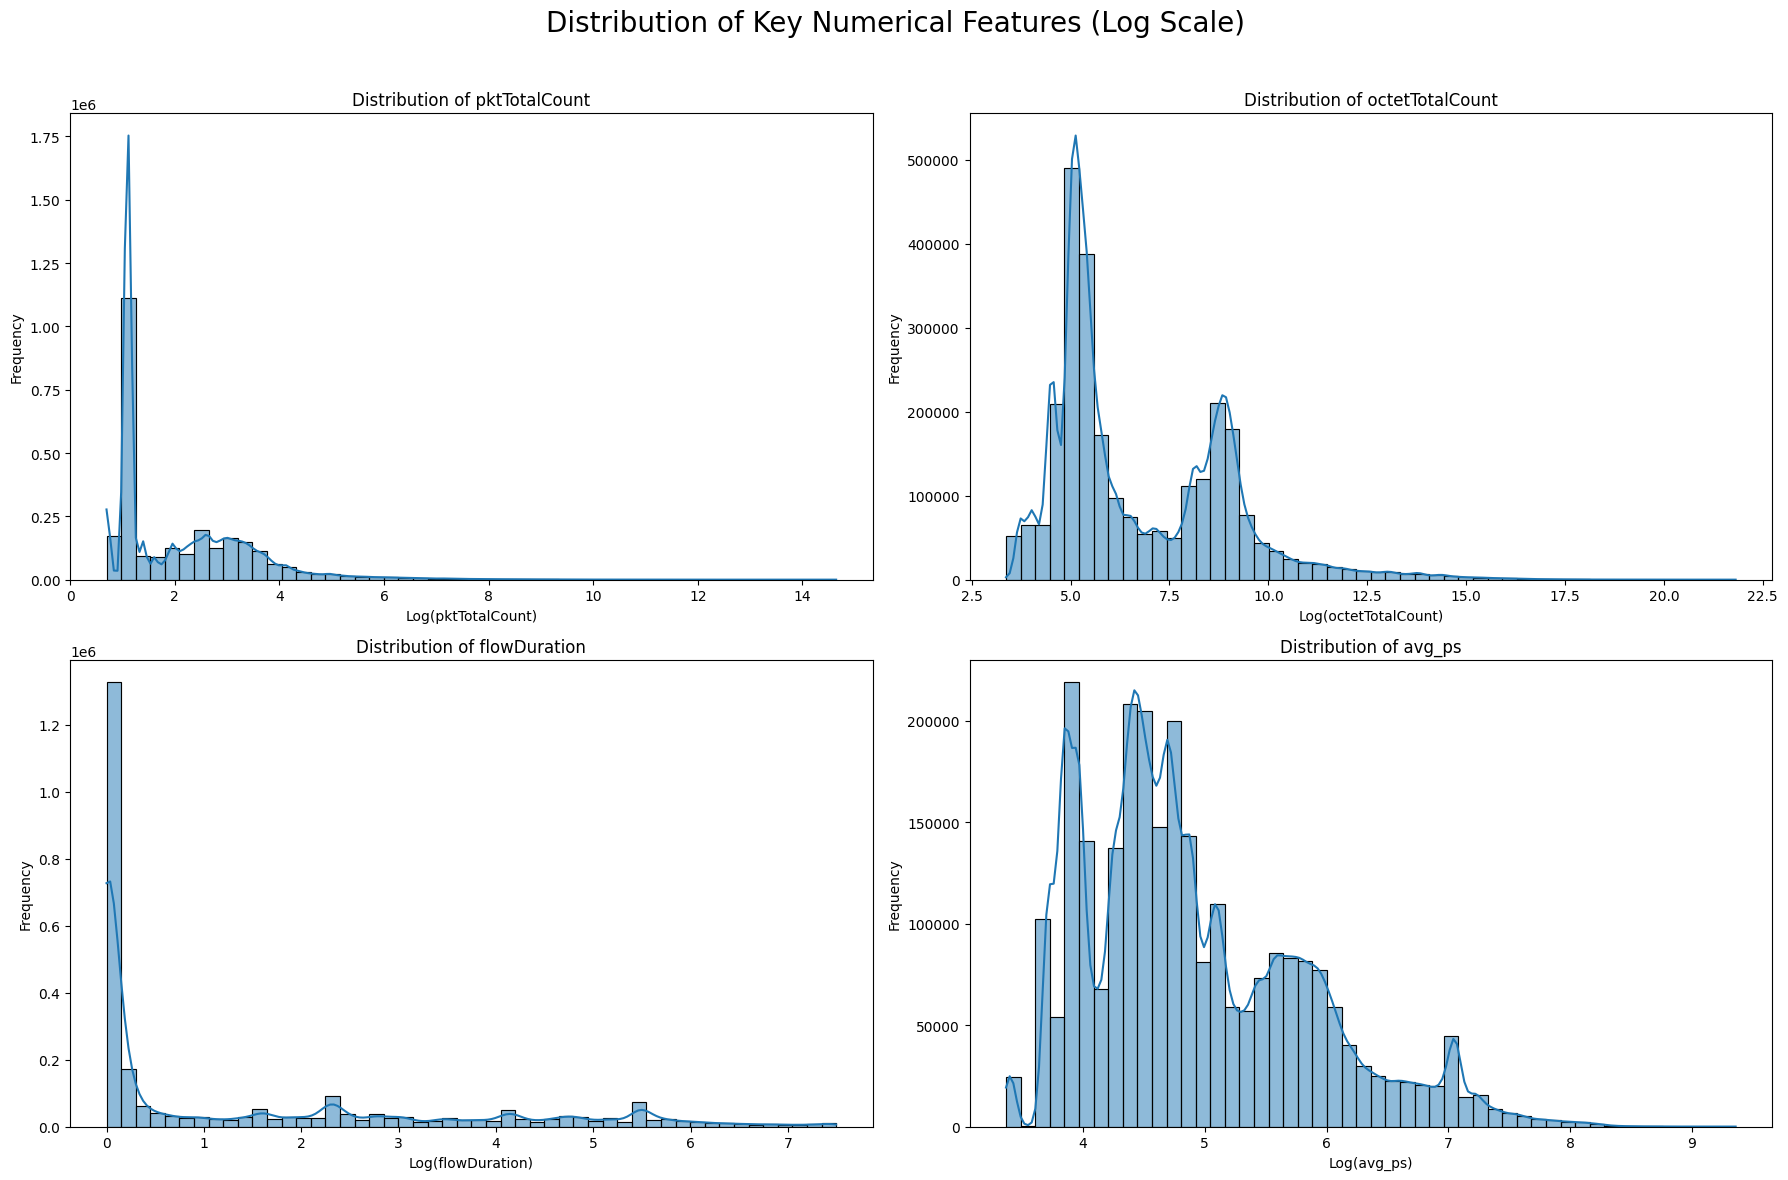

In [ ]:
# Select key numerical features
key_numerical_features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'avg_ps']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Key Numerical Features (Log Scale)', fontsize=20)

# Plot histogram for each selected feature
for i, feature in enumerate(key_numerical_features):
    row, col = i // 2, i % 2
    # Apply log1p transformation (log(1+x)) to handle zeros
    log_data = np.log1p(df[feature])
    sns.histplot(ax=axes[row, col], data=log_data, kde=True, bins=50)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(f'Log({feature})')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Copy df and encode non-target categorical features
df_feats = df.copy()
for c in df_feats.select_dtypes(include="object").columns:
    if c != "web_service":
        df_feats[c] = LabelEncoder().fit_transform(df_feats[c].astype(str))

# Split features and target
X = df_feats.drop(columns=["web_service"])
y = df_feats["web_service"]

# Encode target labels
target_le = LabelEncoder()
y_num = target_le.fit_transform(y)

# ANOVA F-test (feature relevance with categorical target)
f_vals, p_vals = f_classif(X, y_num)

# Store results in DataFrame
anova_results = (
    pd.DataFrame({
        "Feature": X.columns,
        "F_score": f_vals,
        "p_value": p_vals
    })
    .sort_values(by="F_score", ascending=False)
)

f_vals

array([ 1.31857268e+00, -3.17094425e+02,  1.84311990e+03,  8.55573315e+03,
        7.02182590e+03,  1.79338611e+04,  1.85818799e+04,  1.43622840e+02,
        2.89024435e+02,  2.18800648e+03,  3.48301398e+03,  3.39048572e+03,
        4.39481690e+03,  4.54381230e+02,  4.54363685e+02,  3.65487386e+03,
        1.98908870e+03,  2.95419648e+03,  3.13240336e+03,  1.41102231e+03,
        8.92015324e+01,  9.15316740e+02,  1.72365535e+03,  2.57230244e+03,
        1.49092184e+03,  2.93856124e+03,  4.54381230e+02,  7.69751817e+03,
        3.72657212e+03,  1.00242980e+03,  3.04251277e+03,  1.76621943e+03,
        1.81910896e+03,  1.45030837e+02,  3.77662182e+01,  6.25444274e+03,
        3.29213456e+03,  3.35279030e+03,  4.08543603e+03,  6.75603364e+03,
        6.75603349e+03,  8.87700529e+03,  1.21333199e+02,  7.27278310e+02,
        2.06489261e+02,  7.89302431e+02,  6.00311004e+03,  1.73313633e+06,
        1.27145817e+04])

In [ ]:
# Sort features by F-score and compute cumulative percentage
anova_sorted = anova_results.sort_values(by="F_score", ascending=False)
anova_sorted["cum_pct"] = anova_sorted["F_score"].cumsum() / anova_sorted["F_score"].sum() * 100

# Select features covering 99.9% of cumulative F-score
top_features = anova_sorted[anova_sorted["cum_pct"] <= 99.9]

print("Number of selected features:", len(top_features))
print("Selected features:\n", top_features)

Number of selected features: 37
Selected features:
                  Feature       F_score  p_value    cum_pct
47              category  1.733136e+06      0.0  91.023498
6                  proto  1.858188e+04      0.0  91.999410
5               dst_port  1.793386e+04      0.0  92.941288
48  application_protocol  1.271458e+04      0.0  93.609052
41        b_flowDuration  8.877005e+03      0.0  94.075268
3               src_port  8.555733e+03      0.0  94.524611
27             f_flowEnd  7.697518e+03      0.0  94.928881
4                 dst_ip  7.021826e+03      0.0  95.297664
39           b_flowStart  6.756034e+03      0.0  95.652487
40             b_flowEnd  6.756033e+03      0.0  96.007311
35              b_min_ps  6.254443e+03      0.0  96.335792
46         flowEndReason  6.003110e+03      0.0  96.651072
12            std_dev_ps  4.394817e+03      0.0  96.881886
38          b_std_dev_ps  4.085436e+03      0.0  97.096451
28        f_flowDuration  3.726572e+03      0.0  97.292169
15  

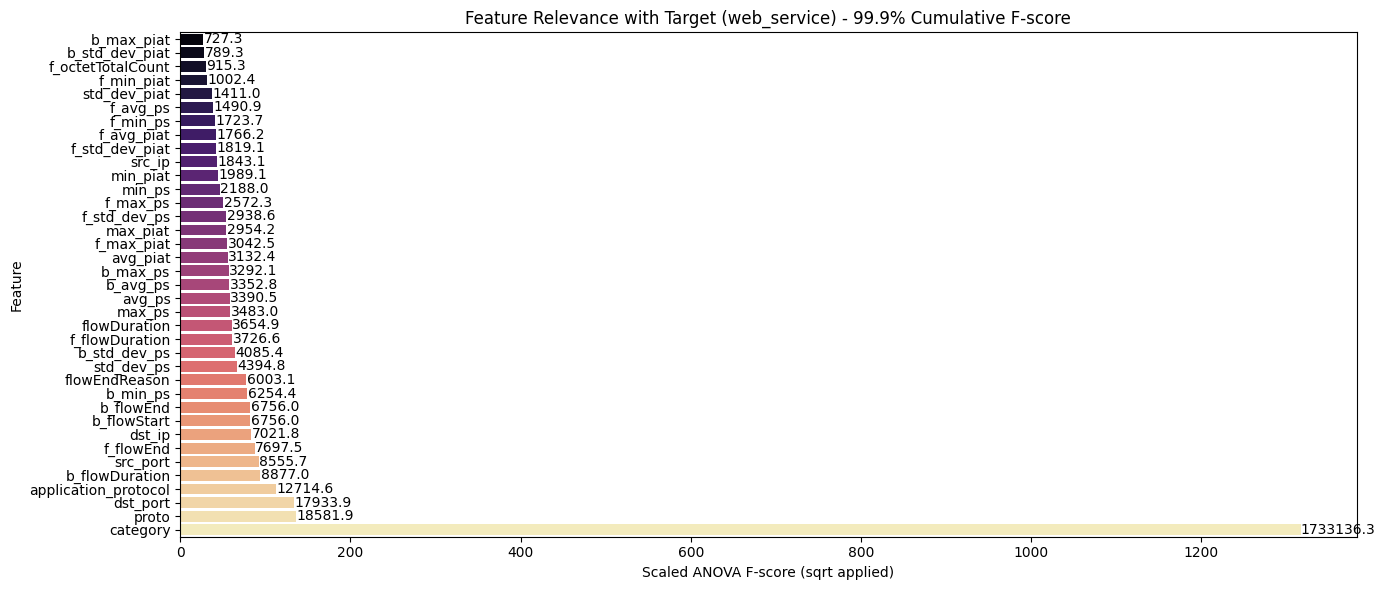

In [ ]:
# Plotting horizontal bar chart
plot_data = top_features.sort_values(by="F_score", ascending=True)
plot_data["F_scaled"] = np.sqrt(plot_data["F_score"])

# --- Plot ---
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=plot_data,
    x="F_scaled",
    y="Feature",
    hue="Feature",
    dodge=False,
    palette="magma",
    legend=False
)

# Annotate actual F-scores on bars
for i, (score, scaled) in enumerate(zip(plot_data["F_score"], plot_data["F_scaled"])):
    ax.text(
        scaled + 0.5,
        i,
        f"{score:.1f}",
        va="center",
        ha="left",
        fontsize=10,
        color="black"
    )

plt.title("Feature Relevance with Target (web_service) - 99.9% Cumulative F-score")
plt.xlabel("Scaled ANOVA F-score (sqrt applied)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Data Preprocessing

In [ ]:
# Count rows per web_service label
ws_counts = df["web_service"].value_counts()

# Keep only labels with at least 50 samples
labels_to_keep = ws_counts[ws_counts >= 50].index

# Filter dataframe
df_clean = df[df["web_service"].isin(labels_to_keep)].copy()
df = df_clean

print("Dataset shape before filtering:", df.shape)
print("Dataset shape after filtering:", df_clean.shape)
print("Number of remaining labels:", df_clean["web_service"].nunique())

Dataset shape before filtering: (2704243, 50)
Dataset shape after filtering: (2704243, 50)
Number of remaining labels: 94


In [ ]:
# Select features based on ANOVA F-score
X_feat = df[top_features["Feature"].tolist()].copy()

# Encode any remaining categorical features
for c in X_feat.select_dtypes(include="object").columns:
    X_feat[c] = LabelEncoder().fit_transform(X_feat[c].astype(str))

# Prepare target
y_target = df["web_service"]
y_le = LabelEncoder()
y_num = y_le.fit_transform(y_target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_feat, y_num, test_size=0.2, random_state=42, stratify=y_num
)

### 1st Model - **XGBoost**


In [ ]:
# Train XGBoost classifier for multi-class traffic classification
xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=len(y_le.classes_),  # number of web_service classes
    eval_metric="mlogloss",
    random_state=42
)

# Fit model on training data
xgb_model.fit(X_train, y_train)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [ ]:
# Save trained XGBoost model to current directory
xgb_model.save_model("xgb_model.json")
print("Model saved as xgb_model.json")

# Load the saved model
xgb_loaded = xgb.XGBClassifier()
xgb_loaded.load_model("xgb_model.json")
print("Model loaded successfully")

Model saved as xgb_model.json
Model loaded successfully


In [ ]:
# Predict on test set using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# --- Metrics ---
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average="weighted", zero_division=0)
recall = recall_score(y_test, y_pred_xgb, average="weighted", zero_division=0)
r2_val = r2_score(y_test, y_pred_xgb)

# Adjusted R²
n_samples = len(y_test)
n_features = X_test.shape[1]
adj_r2 = 1 - (1 - r2_val) * (n_samples - 1) / (n_samples - n_features - 1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"R² (pseudo): {r2_val:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred_xgb,
    target_names=y_le.classes_,
    zero_division=0
))

Accuracy: 0.8782
Precision (weighted): 0.8691
Recall (weighted): 0.8782
R² (pseudo): 0.8551
Adjusted R²: 0.8551

Classification Report:
                     precision    recall  f1-score   support

             Amazon       0.77      0.77      0.77     17515
        AmazonVideo       0.64      0.92      0.76      1021
              Apple       0.47      0.51      0.49      1653
          ApplePush       0.70      0.84      0.76       983
         AppleStore       0.00      0.00      0.00        57
        AppleiCloud       0.19      0.42      0.26       613
        AppleiTunes       0.00      0.00      0.00       141
               BJNP       0.00      0.00      0.00       112
         BitTorrent       0.98      0.99      0.98     14151
           CiscoVPN       0.00      0.00      0.00        85
         Cloudflare       0.83      0.86      0.84      3386
               DHCP       0.47      0.64      0.54       404
                DNS       0.98      0.98      0.98     83983
       DN

### 2nd Model - **K Nearest Neighbour(KNN)**

In [ ]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance",
    n_jobs=-1  # utilize all CPU cores
)

# Train the KNN model
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [ ]:
# Predict using trained KNN model
y_pred_knn = knn_model.predict(X_test)

# Convert predictions to list and save as JSON
y_pred_knn_list = y_pred_knn.tolist()
with open("y_pred_knn.json", "w") as f:
    json.dump(y_pred_knn_list, f)

print("KNN predictions saved to y_pred_knn.json")

KNN predictions saved to y_pred_knn.json


In [ ]:
# Metrics for KNN model
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average="weighted", zero_division=0)
recall = recall_score(y_test, y_pred_knn, average="weighted", zero_division=0)
r2_val = r2_score(y_test, y_pred_knn)

# Adjusted R²
n_samples = len(y_test)
n_features = X_test.shape[1]
adj_r2 = 1 - (1 - r2_val) * (n_samples - 1) / (n_samples - n_features - 1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"R² (pseudo): {r2_val:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred_knn,
    target_names=y_le.classes_,
    zero_division=0
))

Accuracy: 0.4514
Precision (weighted): 0.4311
Recall (weighted): 0.4514
R² (pseudo): -0.0671
Adjusted R²: -0.0672

Classification Report:
                     precision    recall  f1-score   support

             Amazon       0.19      0.28      0.23     17515
        AmazonVideo       0.14      0.10      0.12      1021
              Apple       0.08      0.09      0.08      1653
          ApplePush       0.30      0.28      0.29       983
         AppleStore       0.04      0.04      0.04        57
        AppleiCloud       0.03      0.03      0.03       613
        AppleiTunes       0.12      0.08      0.09       141
               BJNP       0.91      0.99      0.95       112
         BitTorrent       0.74      0.75      0.75     14151
           CiscoVPN       0.00      0.00      0.00        85
         Cloudflare       0.09      0.14      0.11      3386
               DHCP       0.87      0.73      0.79       404
                DNS       0.54      0.68      0.60     83983
       

### 3rd Model - **Random Forest**

In [ ]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=60,       # number of trees
    max_depth=None,        # allow full depth
    random_state=42,
    n_jobs=-1              # use all CPU cores
)

# Fit the model
rf_model.fit(X_train, y_train)

,n_estimators,60
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Save Random Forest model
joblib.dump(rf_model, "rf_model.pkl")
print("Random Forest model saved as rf_model.pkl")

# Load the saved model
rf_loaded = joblib.load("rf_model.pkl")
print("Random Forest model loaded successfully")

Random Forest model saved as rf_model.pkl
Random Forest model loaded successfully


In [ ]:
# Predict on test set using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Convert predictions to list and save as JSON
y_pred_rf_list = y_pred_rf.tolist()
with open("y_pred_rf.json", "w") as f:
    json.dump(y_pred_rf_list, f)

print("Random Forest predictions saved to y_pred_rf.json")

Random Forest predictions saved to y_pred_rf.json


In [ ]:
# Metrics for Random Forest model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average="weighted", zero_division=0)
recall = recall_score(y_test, y_pred_rf, average="weighted", zero_division=0)
r2_val = r2_score(y_test, y_pred_rf)

# Adjusted R²
n_samples = len(y_test)
n_features = X_test.shape[1]
adj_r2 = 1 - (1 - r2_val) * (n_samples - 1) / (n_samples - n_features - 1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"R² (pseudo): {r2_val:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred_rf,
    target_names=y_le.classes_,
    zero_division=0
))

Accuracy: 0.9791
Precision (weighted): 0.9787
Recall (weighted): 0.9791
R² (pseudo): 0.9880
Adjusted R²: 0.9880

Classification Report:
                     precision    recall  f1-score   support

             Amazon       0.96      0.97      0.97     17515
        AmazonVideo       0.99      0.99      0.99      1021
              Apple       0.98      0.91      0.94      1653
          ApplePush       1.00      1.00      1.00       983
         AppleStore       0.98      0.93      0.95        57
        AppleiCloud       0.95      0.94      0.95       613
        AppleiTunes       0.99      0.92      0.96       141
               BJNP       1.00      1.00      1.00       112
         BitTorrent       1.00      1.00      1.00     14151
           CiscoVPN       1.00      0.98      0.99        85
         Cloudflare       0.97      0.98      0.98      3386
               DHCP       1.00      1.00      1.00       404
                DNS       1.00      1.00      1.00     83983
       DN

### 4th Model - **Logistical Regression**

In [ ]:
# Train Logistic Regression
logreg_model = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=500,
    n_jobs=-1,
    random_state=42
)

# Fit the model
logreg_model.fit(X_train, y_train)

c:\Users\abhim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,500
,multi_class,'multinomial'


In [ ]:
# Save Logistic Regression model
joblib.dump(logreg_model, "logreg_model.pkl")
print("Logistic Regression model saved as logreg_model.pkl")

# Load the saved model
logreg_loaded = joblib.load("logreg_model.pkl")
print("Logistic Regression model loaded successfully")

Logistic Regression model saved as logreg_model.pkl
Logistic Regression model loaded successfully


In [ ]:
# Predict on test set
y_pred_logreg = logreg_model.predict(X_test)

# Metrics for Logistic Regression
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg, average="weighted", zero_division=0)
recall = recall_score(y_test, y_pred_logreg, average="weighted", zero_division=0)
r2_val = r2_score(y_test, y_pred_logreg)

# Adjusted R²
n_samples = len(y_test)
n_features = X_test.shape[1]
adj_r2 = 1 - (1 - r2_val) * (n_samples - 1) / (n_samples - n_features - 1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"R² (pseudo): {r2_val:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred_logreg,
    target_names=y_le.classes_,
    zero_division=0
))

Accuracy: 0.2879
Precision (weighted): 0.1295
Recall (weighted): 0.2879
R² (pseudo): -0.6634
Adjusted R²: -0.6635

Classification Report:
                     precision    recall  f1-score   support

             Amazon       0.00      0.00      0.00     17515
        AmazonVideo       0.00      0.00      0.00      1021
              Apple       0.00      0.00      0.00      1653
          ApplePush       0.00      0.00      0.00       983
         AppleStore       0.00      0.00      0.00        57
        AppleiCloud       0.00      0.00      0.00       613
        AppleiTunes       0.00      0.00      0.00       141
               BJNP       0.00      0.00      0.00       112
         BitTorrent       0.00      0.00      0.00     14151
           CiscoVPN       0.00      0.00      0.00        85
         Cloudflare       0.00      0.00      0.00      3386
               DHCP       0.00      0.00      0.00       404
                DNS       0.36      0.90      0.51     83983
       

In [ ]:
# Save predictions as JSON
y_pred_logreg_list = y_pred_logreg.tolist()
with open("y_pred_logreg.json", "w") as f:
    json.dump(y_pred_logreg_list, f)

print("Logistic Regression predictions saved to y_pred_logreg.json")

Logistic Regression predictions saved to y_pred_logreg.json


---

## 4. Discussion of Results

### Model Comparison

The performance of the four models varied significantly. **Random Forest** was the top performer, achieving near-perfect scores, followed by **XGBoost**. **KNN** and **Logistic Regression** were not well-suited for this task.

| Model               | Accuracy | Precision (Weighted) | Recall (Weighted) | F1-score (Weighted) |
| ------------------- | -------- | -------------------- | ----------------- | ------------------- |
| Logistic Regression | 0.29     | 0.13                 | 0.29              | 0.18                |
| KNN (k=5)           | 0.45     | 0.43                 | 0.45              | 0.43                |
| XGBoost             | 0.88     | 0.87                 | 0.88              | 0.87                |
| Random Forest       | 0.98     | 0.98                 | 0.98              | 0.98                |

**Best Model:** Random Forest achieved the highest performance, with a weighted F1-score of **0.98**, significantly outperforming all other models.

### Feature Importance

Feature selection using the ANOVA F-test highlighted several strong predictors:
- High-level categorical identifiers such as `category` and `application_protocol`.
- Core flow characteristics including `proto`, `dst_port`, `src_port`.
- Flow duration metrics like `b_flowDuration` and `f_flowEnd`.

### Confusion and Misclassification

- **Random Forest and XGBoost** correctly classified the majority classes (DNS, Google, TLS) with high accuracy.  
- **XGBoost** struggled with minority classes, often failing to predict them (F1-score near 0.00 for rare classes).  
- **Random Forest** was robust, achieving strong results even for minority classes.  
- **KNN and Logistic Regression** showed widespread misclassification. Logistic Regression, in particular, only performed reasonably for the top three majority classes.  

### Impact of Class Imbalance

The dataset is highly imbalanced, even after filtering out classes with fewer than 50 samples.  
- Logistic Regression and KNN were severely affected.  
- XGBoost managed better but still underperformed on rare classes.  
- Random Forest proved most resilient, successfully learning both common and infrequent traffic types.  

### Insights

- **Tree-based ensemble methods (Random Forest, XGBoost)** are the most effective for traffic classification, as they capture complex non-linear feature interactions.  
- **Linear models (Logistic Regression)** are unsuitable due to oversimplification of patterns.  
- **KNN** provides moderate performance but is computationally inefficient for large datasets.  

---

## Conclusion

This study demonstrates that **machine learning can accurately classify network traffic flows into service categories using flow-level features**.  

- **Best model:** Random Forest with near-perfect results (F1 ≈ 0.98).  
- **Key features:** Protocol identifiers, port numbers, and flow duration statistics.  
- **Practical applications:** Network monitoring, Quality of Service (QoS) management, and anomaly detection.  
- **Future improvements:** Apply advanced sampling (e.g., SMOTE) for class imbalance, use dimensionality reduction or feature selection, and explore deep learning models (e.g., CNNs or RNNs on flow sequences).  

---
